## Datos DSE-CONACyT para el Estado de Veracruz

## Descripción

 Análisis de los datos de acceso público de la Dirección de Seguimiento Epidemiológico (DSE) en los que se basa el sitio web del Consejo Nacional de Ciencia y Tecnología (CONACyT) recortados para el Estado de Veracruz. La fecha de actualización de los datos es del 20 de febrero del 2022. Datos disponibles en:

> https://www.gob.mx/salud/documentos/datos-abiertos-152127

## Librerias

In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import random as rnd
import os


from matplotlib.patches import FancyBboxPatch

## Cargar archivo(s)

In [2]:
# Imprimir informacion de proceso
verbose = True


In [3]:

# Localización del archivo

dir_datos = os.environ.get('DATA_DIR')              # Directorio donde se encuentran los datos
sub_dir = 'DSE'                                                # Sub-directorio del archivo 
nom_archivo = '2022-02-20_DSE_COVID_Nal.csv'                         # Nombre del archivo

archivo = os.path.join(dir_datos, sub_dir, nom_archivo)        # Ruta del archivo

# Información del archivo

tamano_archivo = os.path.getsize(archivo)                      # Tamaño del archivo en bytes
archivos_dir = os.listdir(os.path.join(dir_datos, sub_dir))    # Lista de archivos en directorio 
datos_covid = pd.read_csv(archivo)
if verbose:
    
    print("Archivos en carpeta: ", archivos_dir, sep= '\n', end = '\n\n')
    print(f"El tamaño de {nom_archivo} es de : {tamano_archivo/1000000} megabytes")
    print('Archivo cargado.')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Archivos en carpeta: 
['2022-02-20_DSE_COVID_Nal.csv', '22-02-20_DSE_COVID', 'diccionario_de_datos']

El tamaño de 2022-02-20_DSE_COVID_Nal.csv es de : 2413.815568 megabytes
Archivo cargado.


In [4]:
# Catalogo de datos

dir_datos = os.environ.get('DATA_DIR')       # Directorio donde se encuentran los datos
sub_dir = 'DSE/Diccionario_de_datos'         # Sub-directorio del archivo 
nom_archivo = 'DSE_Catalogos_Trabajo.xlsx'   # Nombre del archivo de datos

ruta_datos = os.path.join(dir_datos, sub_dir, nom_archivo)       # Ruta al archivo de datos

archivo_diccionario = pd.ExcelFile(ruta_datos)
hojas_catalogos = archivo_diccionario.sheet_names

#tamano_archivo = os.path.getsize(archivo)                       # Tamaño del archivo en bytes
#archivos_dir = os.listdir(os.path.join(dir_datos, sub_dir))     # Lista de archivos en directorio 

catalogos = {}

for catalogo in ['TIPO_PACIENTE', 'SEXO', 'SI_NO']:
    df = archivo_diccionario.parse(catalogo)
    diccionario = {}
    for _, row in df.iterrows():
        diccionario[row['CLAVE']] = row['DESCRIPCION']
    catalogos[catalogo] = diccionario

if verbose:
    #print("Archivos en carpeta: ", archivos_dir, sep= '\n', end = '\n\n')
    #print(f"El tamaño de {nom_archivo} es de : {tamano_archivo} bytes")
    print(f'Hojas en en la libreta de excel: {hojas_catalogos}', end = '\n\n')
    
    print(f'Catalogos cargados...')
    for catalogo in catalogos:
        print(f'Diccionario {catalogo} cargado:')
        print(catalogos[catalogo])


Hojas en en la libreta de excel: ['ORIGEN', 'SECTOR', 'SEXO', 'TIPO_PACIENTE', 'SI_NO', 'NACIONALIDAD', 'RESULTADO_LAB', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL', 'ENTIDADES', 'MUNICIPIOS']

Catalogos cargados...
Diccionario TIPO_PACIENTE cargado:
{1: 'AMBULATORIO', 2: 'HOSPITALIZADO', 99: 'NO ESPECIFICADO'}
Diccionario SEXO cargado:
{1: 'MUJER', 2: 'HOMBRE', 99: 'NO ESPECIFICADO'}
Diccionario SI_NO cargado:
{1: 'SI ', 2: 'NO ', 97: 'NO APLICA', 98: 'SE IGNORA', 99: 'NO ESPECIFICADO'}


## Observaciones Generales

No existen valores nulos (nan) en ninguna de las columnas pero existen valores que representan la ausencia de valor. En las columnas de fecha, el valor utilizado para representar datos nulos en campos de fecha es '99-99-9999'. Las columnas que contienen datos de claves geoestadisticas del INEGI tienen formato numerico, el valor utilizado para representar un no dato es el 99 y solo se presenta en ENTIDAD_NAC.

FECHA_ACTUALIZACION tiene un solo valor que representa la fecha de actualización de la tabla y la columna ID_REGISTRO es la unica con valores unicos. Siete de las columnas son de tipo objeto y el resto son de tipo int64. Los datos fueron cargados como data frame de pandas y ocupan un 81.3 megabytes en la memoria.


In [5]:
####### Análisis Inicial #####

# Información general

#datos_covid.info()             # Valores nulos y tipo de datos por columna
#datos_covid.describe()         # Estadisticas por columna
#datos_covid.columns.tolist())  # Columnas originales del archivo


# Columna FECHA_ACTUALIZACION

#datos_covid.FECHA_ACTUALIZACION.nunique()          # Solo hay un valor en la columna.
#datos_covid.FECHA_ACTUALIZACION.value_counts()     # Cuenta de valores unicos del campo


# Columnas que representan claves geográficas ('ENTIDAD_UM', 'ENTIDAD_NAC', 'ENTIDAD_RES')

#columnas_claves = ['ENTIDAD_UM', 'ENTIDAD_NAC', 'ENTIDAD_RES']
#datos_covid[['ENTIDAD_UM', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES']].dtypes 
                                                                    # Tipos de datos en columnas seleccionadas.
#np.unique(datos_covid.ENTIDAD_UM.unique() <= 32 )                  # Todos los valores estan dentro de los rangos 
                                                                    # de claves de Estado ( 1 a 32).
#datos_covid[datos_covid['ENTIDAD_NAC'] > 32].ENTIDAD_NAC.unique()  # Solo un valor sale de los rangos de clave de 
                                                                    # estado (esto significa que nació en otro pais 
                                                                    # o no se sabe donde nació).
#np.unique(datos_covid.ENTIDAD_RES.unique() <= 32)                  # Todos los valores estan dentro de los rangos
                                                                    # de clave de estado.


# Columna ID_REGISTRO

#datos_covid.ID_REGISTRO.is_unique                      # Todos los valores de la columna son únicos.
#type(datos_covid.ID_REGISTRO.iloc[5])                  # El tipo de dato de cada elemento es String
#datos_covid.ID_REGISTRO.str.len().value_counts()       # Hay 266297 elementos con una cadena de 
                                                        # longitud 6 y 7 de longitud 7.


# Columnas con fechas ('FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF')

#datos_covid.FECHA_INGRESO.isna().sum()                             # Columna sin valores nulos
#(datos_covid['FECHA_INGRESO'] == '9999-99-99').value_counts()      # Columna sin clave de fecha nula

#datos_covid.FECHA_SINTOMAS.isna().sum()                            # Columna sin valores nulos
#(datos_covid['FECHA_SINTOMAS'] == '9999-99-99').value_counts()     # Cuenta en ceros de clave que 
                                                                    # representa valores nulos
#datos_covid['FECHA_SINTOMAS'].sort_values(ascending = False)       # Comprobación de que no hay claves 
                                                                    # de valores nulos

#datos_covid.FECHA_DEF.isna().sum() # Columna sin valores nulos
#(datos_covid['FECHA_DEF'] == '9999-99-99').value_counts()          # Cuenta de claves que representan 
                                                                    # valores nulos (247,969)
#datos_covid['FECHA_DEF'].sort_values(ascending = False)            # Comprobación de que no hay claves 
                                                                    # de valores nulos


# Columna EDAD

#datos_covid['EDAD'].dtypes                                 # Es un numero integro
#datos_covid['EDAD'].isna().value_counts()                  # No tiene valores nulos
#datos_covid['EDAD'].value_counts()                         # Valores únicos
#datos_covid['EDAD'].max()                                  # Valor máximo es de 121
#datos_covid['EDAD'].min()                                  # Valor mínimo es de 0


# Valores únicos en columnas

#col_sin_clave = ['ID_REGISTRO', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'MUNICIPIO_RES', 'EDAD']
                                                            # Columnas sin valores categorizados
#for col in datos_covid.columns:                            # Imprimir claves de columna
#    if col not in col_sin_clave:                           # si no aparece en la lista de columnas
#        print(col, ':', sep='')                            # con valores continuos
#        print(datos_covid[col].unique().tolist())


## Limpieza de datos

Se eliminó la columna FECHA_ACTUALIZACION y se guardo el valor unico que contiene (2021-11-09) en una variable. Las columnas con fechas en formato de string fueron coercionadas a convertirse a formato fecha. Los string sin un formato valido de fecha ('99-99-9999') fueron convertidos a valores nulos (nat - not a time). Las columnas con formato de fecha son:

    * FECHA_ACTUALIZACION
    * FECHA_INGRESO
    * FECHA_SINTOMAS
    * FECHA_DEF
    

Las columnas que representan claves de entidades geográficas fueron convertidas a formato string y se estandarizó la longitud en su formato a 2 caracteres en las columnas con clave de entidad, y a 3 caracteres en el caso de la columnas con claves municipales. Las columnas con claves geo-estadísticas son:

    * ENTIDAD_NAC
    * ENTIDAD_RES
    * MUNICIPIO_RES


Todas las columnas necesitan de catálogo de datos para interpretar su contenido. Solo la columna ID_REGISTRO (que es un identificador único de registro) y las columnas con formato de fecha no lo necesitan. El catalogo está disponible en formato Excel dentro de la carpeta con el nombre 'DSE/Diccionario_de_datos', en el archivo 'DSE_Catalogos_Trabajo.xlsx'. La tabla cuenta con Diccionario de Datos en la misma carpeta con el nombre '201128 Descriptores.

Se agregaron dos columnas para facilitar el analisis. La primera tiene el nombre RANGOS_EDAD y contiene rangos de cinco años para la edad establecida en la columna EDAD. La segunda columna tiene el nombre de FECHA_RECUPERACION y agrega 14 dias a fecha de inicio de sintomas (FECHA_SINTOMAS).




In [6]:
######## LIMPIEZA DE DATOS #########

if 'FECHA_ACTUALIZACION' in datos_covid.columns:

    # Se eliminó la columna FECHA_ACTUALIZACION porque solo tiene un 
    # valor que representa la fecha de corte (2021-11-09).

    fecha_corte = dt.datetime.strptime(datos_covid['FECHA_ACTUALIZACION'].iloc[0], '%Y-%m-%d') 
                                                                            # Guardar fecha de corte en variable

    datos_covid.drop(columns = 'FECHA_ACTUALIZACION', inplace = True)       # Eliminar columna


    # Cambiar los datos que son fecha a tipo a fecha

    datos_covid['FECHA_INGRESO'] = pd.to_datetime(datos_covid['FECHA_INGRESO'], errors='coerce')
    datos_covid['FECHA_SINTOMAS'] = pd.to_datetime(datos_covid['FECHA_SINTOMAS'], errors='coerce')
    datos_covid['FECHA_DEF'] = pd.to_datetime(datos_covid['FECHA_DEF'], errors='coerce')


    # Cambiar las claves de áreas estadísticas municipales y nacionales a string

    datos_covid['ENTIDAD_UM'] = datos_covid['ENTIDAD_UM'].apply('{:0>2}'.format)
    datos_covid['ENTIDAD_NAC'] = datos_covid['ENTIDAD_NAC'].apply('{:0>2}'.format)
    datos_covid['ENTIDAD_RES'] = datos_covid['ENTIDAD_RES'].apply('{:0>2}'.format)
    datos_covid['MUNICIPIO_RES'] = datos_covid['MUNICIPIO_RES'].apply('{:0>3}'.format)


else:
    print('Probablemente ya se limpiaron los datos, porfavor revisar.')


In [7]:
######## AGREGAR COLUMNAS #########

rangos = list(range(0,135,5)) # Crear lista de rangos

# Agregar columna de rango de edad
datos_covid['RANGOS_EDAD'] = pd.cut(x = datos_covid['EDAD'], bins = rangos, right = False) 

# Agregar 14 dias a fecha de inicio de sintomas (FECHA_SINTOMAS)
datos_covid['FECHA_RECUPERACION'] = datos_covid['FECHA_SINTOMAS'] + dt.timedelta(days = 14) 


In [8]:
######## COMPROBACIONES #########


# Comprobaciones columnas de fechas

#datos_covid.FECHA_INGRESO.isna().sum()  # Suma de valores nulos es igual a 0
#datos_covid.FECHA_SINTOMAS.isna().sum() # Suma de valores nulos es igual a 0
#datos_covid.FECHA_DEF.isna().sum()      # Suma de valores nulos es igual a 247,969 
                                         # que es igual al número de claves nulas en el análisis anterior

    
# Comprobaciones columnas de claves ('ENTIDAD_UM', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES')

#datos_covid.ENTIDAD_UM.unique()              # Valores únicos
#datos_covid.ENTIDAD_UM.nunique()             # Numero de valores únicos coincide con cantidad de estados
#datos_covid.ENTIDAD_UM.str.len().unique()    # Todas las claves tienen una longitud de dos

#datos_covid.ENTIDAD_NAC.unique()             # Valores únicos
#datos_covid.ENTIDAD_NAC.nunique()            # Numero de valores únicos con uno más de la cantidad 
                                              # de estados (Clave 99)
#datos_covid.ENTIDAD_NAC.str.len().unique()   # Todas las claves tienen una longitud de dos

#datos_covid.ENTIDAD_RES.unique()             # Valores únicos
#datos_covid.ENTIDAD_RES.nunique()            # Numero de valores únicos coincide con cantidad de estados
#datos_covid.ENTIDAD_RES.str.len().unique()   # Todas las claves tienen una longitud de dos

#np.sort(datos_covid.MUNICIPIO_RES.unique())  # Valores únicos con valores de todos los estados
#datos_covid.MUNICIPIO_RES.str.len().unique() # Todas las claves tienen una longitud de tres
#np.sort(datos_covid[datos_covid['ENTIDAD_RES'] == '30'].MUNICIPIO_RES.unique()) 
                                              # Valores unicos de claves municipales
                                              # de residentes de Veracruz con valores
                                              # correctos ('001'-'212' y '999')
    


## Información contenida en el sitio COVID-CONACyT

Cada registro individual se contabiliza según el lugar de residencia, no el lugar donde se toma la muestra. Esta forma de contabilizar los datos implica que los turistas internacionales que entran al sistema no son contabilizados en las estadisticas.

La muestra de datos extraída de la base de datos nacional toma los casos de residentes veracruzanos y los casos de los que fueron diagnosticados en el Estado de Veracruz aunque sean de otros estados. Para replicar las gráficas a nivel estatal, se redujeron las entradas a solamente a los registros con el valor '30' en ENTIDAD_RES (Entidad de residencia). 

El nombre de cada una de las gráficas está definido según la división realizada en un análisis previo plasmando en el documento Contenido del sitio web COVID-CONACyT (AnalisisPaginaConacyt). En esta seccion se replican los datos en los que se basan las gráficas. 



In [9]:
# Reducir la muestra solo a los habitantes del estado de Veracruz y separar los casos según clasificación final.

registros_condiciones = {
'POSITIVOS' : datos_covid[datos_covid.CLASIFICACION_FINAL.isin([1,2,3])], 
                                                # Casos confirmados (valores 1,2,3 en RESULTADO_FINAL)
'NEGATIVOS' : datos_covid[datos_covid.CLASIFICACION_FINAL.isin([7])],
                                                # Casos negativos (valor 7 en RESULTADO_FINAL)
'SOSPECHOSOS' : datos_covid[datos_covid.CLASIFICACION_FINAL.isin([4,5,6])]
                                                # Casos sospechosos (valores 4,5,6 en RESULTADO_FINAL)
}

### Funciones para el procesamiento de datos

Se codificaron dos funciones y una Lambda (en la Sección 2) para procesar información:
* ***clave_x_descripcion***: Función que regresa una lista que sustituye claves por descripciones. Toma como entrada un array o lista de claves y un diccionario que tiene como llave la clave y como valor la descripción.


* ***por_condicion***: Función que reorganiza la información del diccionario de porcentajes según condición del paciente. Toma como entradaun diccionario de porcentajes, un diccionario de claves, la condicion a extraer y un boleano para imprimir o no información. Regresa un diccionario de porcentajes divididos por condición del paciente.


* ***porcentaje_valores (lambda)***: Función que cuenta los valores de una columna especifica, divide los agregados entre el total de la casos. Usa como entrada una columna de dataframe y un numero entero. Regresa una serie de pandas.


In [10]:
def clave_x_descripcion(claves, diccionario):
    '''
    Función que regresa una lista donde las claves son sustituidas 
    descripciones. Toma como entrada:
    - claves: Un array o lista de claves.
    - diccionario: un diccionario que tiene como llave la clave y 
      como valor la descripción.
    
    Regresa lista de descripciones unicas en el orden que estan las claves
    en la lista de claves.
    '''
    lista = []
    for clave in claves:
        lista.append(diccionario[clave])
    return lista

### Información Sección 1 (S1): Acumulados y Casos activos

La Sección esta compuesta de la suma de casos:
* positivos
* negativos
* sospechosos
* defunciones
* recuperados
* activos

In [11]:
### Lambdas Sección 1 ###
recuperados = lambda x: x[(x['TIPO_PACIENTE'] == 1) &          # Paciente no ambulatorio
                          (x['FECHA_DEF'].isna()) &            # que no haya muerto
                          (x['FECHA_SINTOMAS']  +              # cuya fecha de incio de sintomas
                          dt.timedelta(days = 14) <=           # + 14 días sea menor o igual 
                          fecha_corte)]                        # a la fecha de corte
'''
Lambda que regresa los registros de pacientes no ambulatorios (clave 1 en columna 
TIPO_PACIENTE), que no tienen fecha de defunción (en la columna FECHA_DEF), cuya 
fecha de incio de sintomas (FECHA_SINTOMAS) + catorce dias, sea menor o igual a la fecha 
de corte (fecha_corte).
'''

difuntos = lambda x: x[x['FECHA_DEF'].notna()]                 # Con fecha de defunción
'''
Lambda que regresa los registros de pacientes que no han muerto (con valor nulo
en la columna FECHA_DEF)
'''

activos = lambda x: x[x['FECHA_RECUPERACION'] > fecha_corte ]  # Pacientes cuya fecha de recuperación
                                                               # sea mayor a la fecha de corte
'''
Lambda que regresa los registros de pacientes cuya fecha de recuperacion (columna
FECHA_RECUPERACION) sea mayor a la fecha de corte. 
De esta forma es como coinciden los numeros con la pagina CONACyT pero **se deberia
incluir que esten vivos tambien (sin valor en la columna FECHA_DEF)** porque los
muertos no estan activos, por lo menos para esta enfermedad.
'''

### Listas ###
lista_condiciones = ['POSITIVOS', 'NEGATIVOS', 'SOSPECHOSOS']          # Lista de condiciones de paciente
columnas_extraer_S1 = ['ENTIDAD_RES','MUNICIPIO_RES', 'ID_REGISTRO']   # Lista de columnas a extraer
columnas_agrupar = ['ENTIDAD_RES', 'MUNICIPIO_RES']                    # Lista de columnas que se van a agrupar

### Diccionarios ###
registros_defunciones = {}  # Registros por condición con fecha de defunción
registros_recuperados = {}  # Registros por condición de personas recuperadas
registros_activos = {}      # Registros por condicion de personas con enfermedad activa


### Organización de información ###
for llave, valor in registros_condiciones.items():
    registros_defunciones[llave] = difuntos(valor)
    registros_recuperados[llave] = recuperados(valor)
    registros_activos[llave] = activos(valor)
    
    
acumulado_condiciones = {}    # Diccionario de totales acumulados por condición.
acumulado_defunciones = {}    # Diccionario de difunciones totales acumuladas por condición.
acumulado_recuperados = {}    # Diccionario de recuperados totales por condición.
acumulado_activos = {}        # Diccionario de activos

# Agregar acumulado de casos positivos, negativos y sospechosos a diccionario numero_casos
# Lambda que regresa los registros de pacientes agrupados por columnas especificas y los cuenta.
for condicion in lista_condiciones:
    acumulado_condiciones[condicion] = registros_condiciones[condicion][columnas_extraer_S1]\
                                        .groupby(columnas_agrupar).count()    
    acumulado_defunciones[condicion] = registros_defunciones[condicion][columnas_extraer_S1]\
                                        .groupby(columnas_agrupar).count()
    acumulado_recuperados[condicion] = registros_recuperados[condicion][columnas_extraer_S1]\
                                        .groupby(columnas_agrupar).count()
    acumulado_activos[condicion] = registros_activos[condicion][columnas_extraer_S1]\
                                        .groupby(columnas_agrupar).count()


In [12]:
#acumulado_condiciones['POSITIVOS'].loc['01'].sum()[0]

### Información Seccion 2 (S2): Porcentajes por sexo, tipo de paciente y comorbilidades según tipo de caso

In [43]:
# Lista de columnas a extraer
lista_comorbilidades = ['DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 
                        'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']

columnas_extraer_s2 = ['SEXO', 'TIPO_PACIENTE'] + lista_comorbilidades

cuenta_valores_s2 = {}

for columna in columnas_extraer_s2:
    cuenta_valores_s2[columna] = {}
    
    for condicion in lista_condiciones:
        cuenta_valores_s2[columna][condicion] = registros_condiciones[condicion]\
                                                [columnas_agrupar + [columna]].\
                                                groupby(columnas_agrupar).\
                                                apply(lambda x: x.value_counts()).\
                                                droplevel([0,1])    



In [44]:
#cuenta_valores['SEXO']['POSITIVOS'].loc['30'].loc[(['002','001'],1)]

In [45]:
######## COMPROBACIONES #########

#registros_condiciones.keys()                                   # llaves en el diccionario registros
#cuenta_valores.keys()                                          # llaves en el diccionario cuenta valores

#set(registros_condiciones.keys()) == set(lista_condiciones)    # llaves de diccionario registros y 
                                                                # lista_condiciones son iguales 

#set(['SEXO', 'TIPO_PACIENTE'] + lista_comorbilidades) == \
#set(cuenta_valores.keys()) == \
#set(columnas_extraer_S2)                                        
                                            # Lista de comorbilidades + sexo y tipo_paciente
                                            # es igual a las llaves del diccionario cuenta_valores
                                            # y a la lista de columnas a extraer de la seccion 2.


# ---------- Comprobacion de datos del diccionario ------

'''
lista_entidades = sorted(list(registros_condiciones['POSITIVOS'].ENTIDAD_RES.unique()))          
                                                                # Lista de valores unicos de la 
                                                                # columna entidad de residencia
extraer_municipios  = lambda x, ent: x[x['ENTIDAD_RES'] == ent]['MUNICIPIO_RES'].unique()
                                                                # lambda que regresa los valores unicos de
                                                                # la columna municipio de residencia para 
                                                                # cada estado.
            
municipios_entidades = {}                                       # Diccionario de municipios por entidad
for entidad in lista_entidades:                                 # Para cada entidad en lista entidades
    municipios_entidades[entidad] = []                          # la llave entidad tendra una lista
    
    for condicion in lista_condiciones:                         # que para cada condicion en condiciones
        municipios_entidades[entidad].extend(                   # extenderá la lista con
            list(extraer_municipios(registros_condiciones[condicion], entidad))) 
                                                                # los valores unicos de la columna municipios
                                                                # para cada entidad.
    municipios_entidades[entidad] = sorted(list(set(municipios_entidades[entidad])))
    
len_condiciones = len(lista_condiciones)
len_entidades = len(lista_entidades)

# Quitar duplicados y ordenar de menor a mayor.

for i in range(500):
    
    condicion_random = lista_condiciones[rnd.randint(0, len_condiciones-1)]
                                                                    # Tipo de condicion aleatoria.
    entidad_random = lista_entidades[rnd.randint(0, len_entidades - 1)]      
                                                                    # Entidad aleatoria.
    municipio_random = municipios_entidades[entidad][rnd.randint(0, len(municipios_entidades[entidad])-1)]
                                                                    # Municipio aleatorio de la entidad aleatoria
    columna_random = columnas_extraer_S2[rnd.randint(0, len(columnas_extraer_S2)-1)] 
                                                                    # Columna aleatoria de la Seccion 2
    try:

        a = cuenta_valores[columna_random][condicion_random].loc[entidad_random]\
                                                            .loc[municipio_random]\
                                                            .sort_index()
        
        b = registros_condiciones[condicion_random]\
                                .groupby(['ENTIDAD_RES', 'MUNICIPIO_RES'])\
                                .get_group((entidad_random, municipio_random))\
                                [columna_random].value_counts().sort_index()

        
        pasa_prueba = a.equals(b)
        
    
    except:
        lista_mun_desde_registro = list(registros_condiciones[condicion_random]\
        [lambda x: x['ENTIDAD_RES'] == entidad_random]['MUNICIPIO_RES'].unique())
        
        lista_mun_desde_calculado = list(
            set([indice for indice,  _ in cuenta_valores[columna_random][condicion_random].\
                 loc[entidad_random].index]))
        
        if municipio_random not in lista_mun_desde_registro and \
        municipio_random not in lista_mun_desde_calculado:
            print(f'En columna {condicion_random}, {entidad_random}, {columna_random}',
                  f'no existe el municipio {municipio_random}')
        else:
            print('Error no especificado')   
    
    if not pasa_prueba:
        print(a, b)
#    else:
#        print('Valores identicos para ',
#              f'{condicion_random}, {entidad_random}, {columna_random}, {municipio_random}')
'''

mostrar_comentario = False
        

# Graficas

In [46]:
def cuadro_informacion(fila, columna, titulo, data, 
                       entidades, municipios, color,  
                       acumulado = False):
    '''
    Función que formatea y despliega cuadros con información. Modifica valores 
    globales. Si la información es acumulada agrega una leyenda al final indicando 
    el tipo de información. 
    Toma como entrada: 
    - fila: El numero de fila para posicionar el elemento en el gridspec.
    - columna: El numero de columna para posicionar el elemento en el gridspec. 
    - titulo: Nombre del dato que esta desplegando.
    - data: data frame con el dato que se quiere desplegar.
    - entidades: Entidades que se van a contabilizar (en formato de lista)
    - municipios: Municipios que se van a sumar (en formato de lista).
    - color: El color que se le va a asignar al titulo.
    - acumulado: Valor boleano que define si el dato es acumulado o no.
    
    '''
    
    
    if entidades is None:
        valor = data.sum()[0]
        
    elif entidades is not None and municipios is None:
        valor = data.loc[entidades].sum()[0]
        
    elif entidades is not None and municipios is not None:
        extraer = []

        for entidad in entidades:
            for municipio in municipios:
                extraer.append((entidad, municipio))
        extraer = set(extraer).intersection(data.index)
        if len(extraer) > 0:
            valor = data.loc[extraer].sum()[0]
        else: valor = 0
        
    ax = fig.add_subplot(gs[fila, columna])                 # Agregar figura
    # Formatear texto
    ax.text(.07, .72, titulo.upper(), color = color)
    ax.text(.07, .37, f"{valor:,}", fontsize = 'xx-large')
    # formatear grafica
    if acumulado:
        ax.text(.07, .12, "Acumulados", color = 'gray', fontsize = 'small')
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
    # Redondear bordes de axes
    p_bbox = FancyBboxPatch((0,0), 
                            1, 1, 
                            facecolor = 'white',
                            edgecolor = 'gray',
                            linewidth = 1,
                            clip_on = True,
                            boxstyle = "round,pad= -0.005, rounding_size = .05", )
    
    ax.add_patch(p_bbox)

In [49]:
def barra_horizontal(fila, columna, titulo, data, 
                     entidades, municipios, clave, 
                     color, diccionario):
    '''
    Función que formatea y desplega gráficas horizontales de una sola barra.
    Toma como entrada: 
    - fila: El numero de fila para posicionar el elemento en el gridspec.
    - columna: El numero de columna para posicionar el elemento en el gridspec. 
    - titulo: Nombre del dato que esta desplegando.
    - data: data frame con el dato que se quiere desplegar.
    - entidades: Entidades que se van a contabilizar (en formato de lista)
    - municipios: Municipios que se van a sumar (en formato de lista).
    - clave: Clave que se va a extraer.
    - diccionario: Diccionario con la descripción de las claves.
    - acumulado: Valor boleano que define si el dato es acumulado o no.
    
    '''
    ax = fig.add_subplot(gs[fila, columna]  # Agregar figura
    
    if entidades is None:
        y_valor = data.xs(clave, level = 2).sum()
        total = data.sum()
        
    elif entidades is not None and municipios is None:
        corte = data.loc[entidades]
        total = corte.sum()
        y_valor = corte.xs(clave, level = 2, drop_level= False).sum()
        
    elif entidades is not None and municipios is not None:
        extraer = []
        for entidad in entidades:
            for municipio in municipios:
                extraer.append((entidad, municipio))

        indices_data = set(data.droplevel(level = 2).index)
        extraer = list(set(extraer).intersection(indices_data))
        
        
        if len(extraer) > 0:
            idx = pd.IndexSlice
            corte = data.loc[idx[entidades,municipios, :]]
            
            total = corte.sum()
            y_valor = corte.xs(clave, level = 2, drop_level = False).sum()
            
        else:
            total = corte.sum()
            y_valor = 0
            
            
    # formatear figura
    ax.set_title(titulo.capitalize())  # agregar titulo
    ax.spines[['top', 'left', 'right']].set_visible(False)
    ax.set_yticks([])
    ax.set_yticklabels([])
    
   
    
    
    ax.set_xlim(0, total)
    ax.set_xticks(np.linspace(0, total, num = 5, endpoint = True, dtype = np.int32))
    ax.set_xticklabels([f'{etiqueta}%'for etiqueta in [0, 25, 50, 75, 100]], 
                   size = 'small')
    # formatear barra
    barra = ax.barh([0], y_valor, color = color, align = 'edge')   # agregar barra
    ax.barh([0], total - y_valor, color = 'lightgray', left = y_valor, height = .1, align = 'edge')
    
    porcentaje_valor = (y_valor * 100) / total 
    ax.bar_label(barra, labels=[f'{porcentaje_valor:.2f}%'], label_type = 'center', size = 'xx-large', color = 'white')
    
    

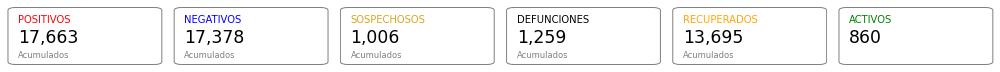

In [39]:
fig = plt.figure(figsize = (14, 3))
gs = gridspec.GridSpec(3, 6, figure = fig)

colores_condiciones = ['red', 'blue', 'goldenrod']

fila, columna = 0, 0
for item, color in zip(acumulado_condiciones.items(), colores_condiciones):
    llave, valor = item[0], item[1]
    ax = cuadro_informacion(fila, columna, llave, 
                            valor, 
                            entidades, municipios, color, 
                            acumulado = True)
    columna += 1

fila, columna = 0, 3
ax = cuadro_informacion(fila, columna, 'DEFUNCIONES', 
                   acumulado_defunciones['POSITIVOS'], 
                   entidades, municipios, 'black', 
                   acumulado = True)

fila, columna = 0, 4
ax = cuadro_informacion(fila, columna, 'RECUPERADOS', 
                   acumulado_recuperados['POSITIVOS'], 
                   entidades, municipios, 'orange', 
                   acumulado = True)

fila, columna = 0, 5
ax = cuadro_informacion(fila, columna, 'ACTIVOS', 
                   acumulado_activos['POSITIVOS'], 
                   entidades, municipios, 'green', 
                   acumulado = False)

plt.tight_layout()



In [47]:
idx = pd.IndexSlice

cuenta_valores_s2['SEXO']['POSITIVOS'].loc[idx[['30'],['002', ' 001'], :]]


ENTIDAD_RES  MUNICIPIO_RES  SEXO
30           002            2       10
                            1        7
dtype: int64

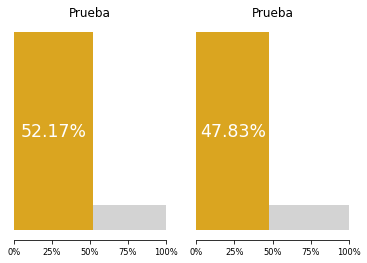

In [53]:
condicion = 'POSITIVOS'
entidades = ['30']
municipios = ['026', '065', '038', '087', ' 093', '136', '182']

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, figure = fig)

columna = 0
fila = 0

for i in range(1,3):
    ax = def barra_horizontal(fila, columna, titulo, data, 
                     entidades, municipios, clave, 
                     color, diccionario):
    columna +=1
    

In [35]:
def insertar_axes(titulo, subtitulos, desplegar, pad, datos, funcion):
    
    ax.set_title(titulo)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([])
    ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)

    num_barras = len(subtitulos)
    insertar_en = np.linspace(0, 1 - pad, num_barras + 1)[:-1]
    indice = 0
    
    for subtitulo in subtitulos:
        if indice == 0:
            ax_sub = ax.inset_axes([insertar_en[indice], 0, (1 - pad)/num_barras, .8])
        else:
            ax_sub = ax.inset_axes([insertar_en[indice] + pad/(num_barras-1), 0, (1- pad)/num_barras , .8])

        barra_horizontal(subtitulo, datos[subtitulo][desplegar], ax_sub)
        indice += 1

# Información Sección 3 (S3)

In [ ]:
### Datos de la primera gráfica seccion tres - Casos por municipio

casos_positivos_municipio = casos_positivos.groupby(['MUNICIPIO_RES']).size()
casos_negativos_municipio = casos_negativos.groupby(['MUNICIPIO_RES']).size()
casos_sospechosos_municipio = casos_sospechosos.groupby(['MUNICIPIO_RES']).size()

In [ ]:
### Datos de la segunda gráfica sección tres - Casos por rango y sexo ###

casos_positivos_rango_y_sexo = casos_positivos.groupby(['RANGOS_EDAD', 'SEXO']).size()
casos_negativos_rango_y_sexo = casos_negativos.groupby(['RANGOS_EDAD', 'SEXO']).size()
casos_sospechosos_rango_y_sexo = casos_sospechosos.groupby(['RANGOS_EDAD', 'SEXO']).size()


In [ ]:
### Datos de la tercera gráfica sección tres - Casos por rango y tipo de paciente ###

casos_positivos_rango_y_tipo = casos_positivos.groupby(['RANGOS_EDAD', 'TIPO_PACIENTE']).size()
casos_negativos_rango_y_tipo = casos_negativos.groupby(['RANGOS_EDAD', 'TIPO_PACIENTE']).size()
casos_sospechosos_rango_y_tipo = casos_sospechosos.groupby(['RANGOS_EDAD', 'TIPO_PACIENTE']).size()


In [ ]:
### Datos de la cuarta gráfica sección tres - Casos por fecha y sexo ###

casos_positivos_fecha_y_sexo = casos_positivos.groupby(['FECHA_INGRESO', 'SEXO']).size()
casos_negativos_fecha_y_sexo = casos_negativos.groupby(['FECHA_INGRESO', 'SEXO']).size()
casos_sospechosos_fecha_y_sexo = casos_sospechosos.groupby(['FECHA_INGRESO', 'SEXO']).size()

## Continuaciones

En esta sección se realizan mas graficas que las disponibles en la pagina.


### Gráficas Sección 2 (S2)

In [ ]:
#crime_year = pd.DataFrame(df.Year.value_counts().reset_index().values, columns=["Year", "AggregateCrime"])
ent_res = datos_covid['ENTIDAD_UM'].groupby(datos_covid['ENTIDAD_UM']).count()




* Llama la atención que a pesar de haber asintomáticos todos los campos de fecha de comienzo de síntomas tienen valores válidos. 